# Hillstrom Eメールマーケティングデータセット分析概要

## データセットの説明

このデータセットは、Eメールマーケティングキャンペーンの効果を測定するための実験データです。過去12ヶ月以内に購入した64,000人の顧客に対して、3つの異なる処理が行われました：

- 1/3の顧客：男性向け商品のEメールキャンペーンを受信
- 1/3の顧客：女性向け商品のEメールキャンペーンを受信
- 1/3の顧客：Eメールを受信しない（対照群）

## 変数の説明

### 顧客属性（特徴量）

| 変数名 | 説明 |
|--------|------|
| **Recency** | 最後の購入からの経過月数 |
| **History_Segment** | 過去1年間の支出額のカテゴリー分類 |
| **History** | 過去1年間の実際の支出金額（ドル） |
| **Mens** | 過去1年間に男性向け商品を購入したかどうか（1=購入した、0=購入していない） |
| **Womens** | 過去1年間に女性向け商品を購入したかどうか（1=購入した、0=購入していない） |
| **Zip_Code** | 郵便番号の分類（都市部、郊外、農村部） |
| **Newbie** | 新規顧客かどうか（1=過去12ヶ月の新規顧客、0=それ以外） |
| **Channel** | 過去1年間に購入したチャネルの説明 |
| **Segment** | 顧客が受け取ったEメールキャンペーンの種類（「Mens E-Mail」、「Womens E-Mail」、「No E-Mail」） |

### 処置/介入変数（分析目的で作成）

| 変数名 | 説明 |
|--------|------|
| **treatment** | Eメールを受け取ったかどうかを示す二値変数<br>・値が1: Eメールを受け取った場合（「Mens E-Mail」または「Womens E-Mail」）<br>・値が0: Eメールを受け取らなかった場合（「No E-Mail」） |
| **group** | 処置群/対照群を文字列で表現<br>・'treatment': Eメールを受け取ったグループ（処置群/介入群）<br>・'control': Eメールを受け取らなかったグループ（対照群） |

### 結果変数（目的変数）

| 変数名 | 説明 |
|--------|------|
| **Visit** | Eメール配信後2週間以内にウェブサイトを訪問したかどうか（1=訪問した、0=訪問していない） |
| **Conversion** | Eメール配信後2週間以内に商品を購入したかどうか（1=購入した、0=購入していない） |
| **Spend** | Eメール配信後2週間以内の実際の支出金額（ドル） |

## 分析の目的

このデータセットを用いた分析の主な目的は、因果推論やアップリフトモデリングを通じて、以下を明らかにすることです：

1. Eメールキャンペーンが顧客の購買行動（訪問、購入、支出額）に与える効果の測定
2. 「男性向けEメール」と「女性向けEメール」の効果の比較
3. どのような顧客層に対してEメールキャンペーンが最も効果的か（異質的処置効果）の特定
4. 将来のキャンペーンのために、最も効果的な顧客セグメントの特定と最適なターゲティング戦略の構築

## 分析アプローチ

分析では、以下のような手法が用いられています：

- 処置群と対照群の比較による平均処置効果（ATE）の推定
- 顧客属性に基づく条件付き平均処置効果（CATE）の推定
- 機械学習モデルを用いた異質的処置効果の推定と最適なターゲティング戦略の構築

In [28]:
# Uplift Modeling APIを利用するためのサンプルNotebook

import requests
import json
import pandas as pd
API_URL = "https://causal-chart-api-620283975862.asia-northeast1.run.app"

# 1. モデルのトレーニング
train_payload = {
    "data": [
        {"Recency": 10, "History": 100, "Mens": 1, "Womens": 0, "Newbie": 0, "treatment": 1, "Conversion": 1},
        {"Recency": 12, "History": 120, "Mens": 1, "Womens": 0, "Newbie": 0, "treatment": 1, "Conversion": 0},
        {"Recency": 8, "History": 90, "Mens": 1, "Womens": 0, "Newbie": 0, "treatment": 0, "Conversion": 0},
        {"Recency": 15, "History": 80, "Mens": 1, "Womens": 0, "Newbie": 0, "treatment": 0, "Conversion": 1},
        {"Recency": 5, "History": 200, "Mens": 0, "Womens": 1, "Newbie": 0, "treatment": 0, "Conversion": 0},
        {"Recency": 7, "History": 180, "Mens": 0, "Womens": 1, "Newbie": 0, "treatment": 0, "Conversion": 1},
        {"Recency": 3, "History": 210, "Mens": 0, "Womens": 1, "Newbie": 0, "treatment": 1, "Conversion": 0},
        {"Recency": 4, "History": 220, "Mens": 0, "Womens": 1, "Newbie": 0, "treatment": 1, "Conversion": 1},
        {"Recency": 20, "History": 50, "Mens": 0, "Womens": 0, "Newbie": 1, "treatment": 0, "Conversion": 0},
        {"Recency": 25, "History": 30, "Mens": 0, "Womens": 0, "Newbie": 1, "treatment": 1, "Conversion": 1}
    ],
    "features": ["Recency", "History", "Mens", "Womens", "Newbie"],
    "treatment_col": "treatment",
    "outcome_col": "Conversion",
    "model_type": "s_learner",
    "model_params": {
        "n_estimators": 100,
        "max_depth": 5
    }
}

response = requests.post(f"{API_URL}/train", json=train_payload)
train_result = response.json()
print("Train Result:", json.dumps(train_result, indent=2, ensure_ascii=False))


Train Result: {
  "message": "s_learner model trained successfully",
  "model_path": "s_learner_20250307_074651.pkl",
  "model_info": {
    "model_type": "s_learner",
    "features": [
      "Recency",
      "History",
      "Mens",
      "Womens",
      "Newbie"
    ],
    "metrics": {
      "actual_ate": 0.5,
      "estimated_ate": 0.11333333333333333,
      "control_outcome": 0.5,
      "treatment_outcome": 1.0
    },
    "timestamp": "20250307_074651"
  }
}


In [29]:
train_result["model_path"]

's_learner_20250307_074651.pkl'

In [30]:
# トレーニング済みモデルのパスを取得
model_path = train_result["model_path"]

# 2. 予測の実行
predict_payload = {
    "features": [
        {"Recency": 8, "History": 150, "Mens": 1, "Womens": 0, "Newbie": 1},
        {"Recency": 3, "History": 250, "Mens": 0, "Womens": 1, "Newbie": 0}
    ],
    "model_path": model_path
}

response = requests.post(f"{API_URL}/predict", json=predict_payload)
predict_result = response.json()
print("Predict Result:", json.dumps(predict_result, indent=2, ensure_ascii=False))



"""

curl -X POST "https://causal-chart-api-620283975862.asia-northeast1.run.app" \
  -H "Content-Type: application/json" \
  -d '{
    "features": [
      {"Recency": 8, "History": 150, "Mens": 1, "Womens": 0, "Newbie": 1},
      {"Recency": 3, "History": 250, "Mens": 0, "Womens": 1, "Newbie": 0}
    ],
    "model_path": "s_learner_20250302_085207.pkl"
  }'
"""

Predict Result: {
  "predictions": [
    0.10000000000000003,
    0.12999999999999995
  ],
  "model_type": "s_learner"
}


'\n\ncurl -X POST "https://causal-chart-api-620283975862.asia-northeast1.run.app"   -H "Content-Type: application/json"   -d \'{\n    "features": [\n      {"Recency": 8, "History": 150, "Mens": 1, "Womens": 0, "Newbie": 1},\n      {"Recency": 3, "History": 250, "Mens": 0, "Womens": 1, "Newbie": 0}\n    ],\n    "model_path": "s_learner_20250302_085207.pkl"\n  }\'\n'

In [31]:
#
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# causalmlライブラリをインポート

from causalml.metrics import plot_qini, qini_score, auuc_score
from causalml.metrics import plot_lift


try:
    df = pd.read_csv("hillstrom.csv")
except FileNotFoundError:
    print("hillstrom.csvが見つかりません。カレントディレクトリにファイルが存在するか確認してください。")
    

print(f"データ件数: {len(df)}")

# 2. 前処理
df.columns = [col.capitalize() for col in df.columns]
df['treatment'] = (df['Segment'] != 'No E-Mail').astype(int)

# 分析で使う特徴量
features = ['Recency', 'History', 'Mens', 'Womens', 'Newbie']

# データ分割 (各モデル間で同じテストデータを使う)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['treatment'])
print(f"訓練データ: {len(train_df)}件, テストデータ: {len(test_df)}件")

# 3. トレーニング用データの準備とAPIリクエスト
train_data = train_df.to_dict('records')

# 各モデルタイプをトレーニング
model_types = ["s_learner", "t_learner", "x_learner", "r_learner", "causal_tree", "uplift_rf"]
model_paths = {}

for model_type in model_types:
    print(f"\nトレーニング: {model_type}")
    train_payload = {
        "data": train_data,
        "features": features,
        "treatment_col": "treatment",
        "outcome_col": "Conversion",
        "model_type": model_type,
        "model_params": {
            "n_estimators": 100,
            "max_depth": 5
        }
    }
    
    response = requests.post(f"{API_URL}/train", json=train_payload)
    if response.status_code == 200:
        result = response.json()
        model_path = result["model_path"]
        model_paths[model_type] = model_path
        metrics = result["model_info"]["metrics"]
        print(f"  成功: {model_type}")
        print(f"  実測ATE: {metrics.get('actual_ate'):.5f}")
        print(f"  推定ATE: {metrics.get('estimated_ate'):.5f}")
    else:
        print(f"  失敗: {response.text}")

# 4. テスト用データの準備と予測
test_features = test_df[features].to_dict('records')

# 5. 各モデルで予測を実行
predictions = {}

for model_type, model_path in model_paths.items():
    print(f"\n予測: {model_type}")
    predict_payload = {
        "features": test_features,
        "model_path": model_path
    }
    
    try:
        response = requests.post(f"{API_URL}/predict", json=predict_payload)
        response.raise_for_status()  # ステータスコードが4xx/5xxの場合は例外を発生
        result = response.json()
        preds = result["predictions"]
        print(f"  成功: {len(preds)}件の予測")
        
        # 予測結果のサイズ修正
        if len(preds) != len(test_df):
            print(f"  警告: 予測サイズ({len(preds)})がテストデータサイズ({len(test_df)})と異なります")
            if len(preds) == 2 * len(test_df):
                # causal_treeは1件の予測に対して2つの値を返す場合がある
                preds = preds[::2]
                print(f"  2倍のサイズのため1つおきに選択: {len(preds)}件")
            elif len(preds) > len(test_df):
                preds = preds[:len(test_df)]
                print(f"  サイズが大きいため切り詰め: {len(preds)}件")
            else:
                mean_val = np.mean(preds)
                preds = preds + [mean_val] * (len(test_df) - len(preds))
                print(f"  サイズが小さいため平均値で埋め: {len(preds)}件")
        
        # R-learnerの異常値修正
        if model_type == 'r_learner':
            preds_array = np.array(preds, dtype=float)
            outliers = np.abs(preds_array) > 1
            if np.any(outliers):
                outlier_count = np.sum(outliers)
                print(f"  警告: {outlier_count}件の異常値を検出")
                median = np.median(preds_array[~outliers]) if np.sum(~outliers) > 0 else 0
                preds_array[outliers] = median
                print(f"  異常値を中央値({median:.5f})で置換")
                preds = preds_array.tolist()
        
        predictions[model_type] = preds
    except Exception as e:
        print(f"  失敗: {str(e)}")

# 6. アップリフト評価
y_test = test_df['Conversion'].values
w_test = test_df['treatment'].values



データ件数: 64000
訓練データ: 44800件, テストデータ: 19200件

トレーニング: s_learner
  成功: s_learner
  実測ATE: 0.00568
  推定ATE: 0.00340

トレーニング: t_learner
  成功: t_learner
  実測ATE: 0.00568
  推定ATE: 0.00484

トレーニング: x_learner
  成功: x_learner
  実測ATE: 0.00568
  推定ATE: 0.00488

トレーニング: r_learner
  成功: r_learner
  実測ATE: 0.00568
  推定ATE: 0.00511

トレーニング: causal_tree
  成功: causal_tree
  実測ATE: 0.00568
  推定ATE: 0.00809

トレーニング: uplift_rf
  成功: uplift_rf
  実測ATE: 0.00568
  推定ATE: 0.00478

予測: s_learner
  成功: 19200件の予測

予測: t_learner
  成功: 19200件の予測

予測: x_learner
  成功: 19200件の予測

予測: r_learner
  成功: 19200件の予測

予測: causal_tree
  成功: 38400件の予測
  警告: 予測サイズ(38400)がテストデータサイズ(19200)と異なります
  2倍のサイズのため1つおきに選択: 19200件

予測: uplift_rf
  成功: 19200件の予測



=== モデル性能比較 ===
1位: uplift_rf (Qini面積: 0.004508)
2位: t_learner (Qini面積: 0.004007)
3位: x_learner (Qini面積: 0.003861)
4位: s_learner (Qini面積: 0.003484)
5位: r_learner (Qini面積: 0.002830)
6位: causal_tree (Qini面積: -0.000396)

最良モデル: uplift_rf (Qini面積: 0.004508)


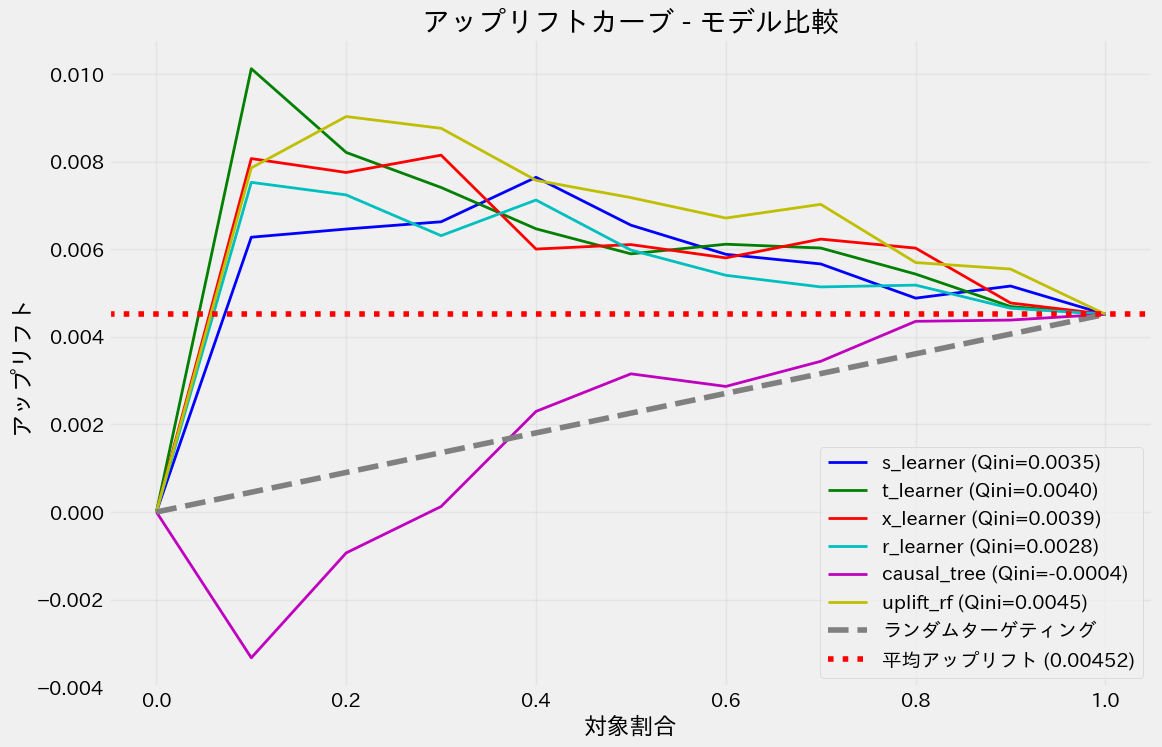

In [32]:
print("\n=== モデル性能比較 ===")
# スコアがある場合のみソート
if all_scores:
    sorted_models = sorted(all_scores.items(), key=lambda x: x[1], reverse=True)
    for i, (model, score) in enumerate(sorted_models):
        print(f"{i+1}位: {model} (Qini面積: {score:.6f})")
    
    best_model = sorted_models[0][0]
    print(f"\n最良モデル: {best_model} (Qini面積: {all_scores[best_model]:.6f})")
else:
    print("有効なモデルスコアがありません。")

# カスタムのモデル比較プロット
try:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 色のリスト
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
    
    # サンプル割合の配列（x軸）
    proportions = np.linspace(0, 1, 11)  # 0から1まで10分割
    
    for idx, (model_type, preds) in enumerate(predictions.items()):
        if model_type not in all_scores:
            continue
            
        color = colors[idx % len(colors)]
        
        # NaN値のチェックと置換
        preds_array = np.array(preds, dtype=float)
        if np.isnan(preds_array).any():
            mean_val = np.nanmean(preds_array)
            preds_array = np.nan_to_num(preds_array, nan=mean_val)
        
        # 予測値でソート
        sorted_idx = np.argsort(-preds_array)
        y_sorted = y_test[sorted_idx]
        w_sorted = w_test[sorted_idx]
        
        # 各割合でのアップリフト計算
        uplift_values = [0]  # 0%地点は0
        
        for i in range(1, len(proportions)):
            prop = proportions[i]
            n_samples = int(len(y_sorted) * prop)
            
            # その割合までのデータ
            y_subset = y_sorted[:n_samples]
            w_subset = w_sorted[:n_samples]
            
            # 処理群と対照群の平均を計算
            if np.sum(w_subset == 1) > 0 and np.sum(w_subset == 0) > 0:
                mean_treatment = np.mean(y_subset[w_subset == 1])
                mean_control = np.mean(y_subset[w_subset == 0])
                uplift = mean_treatment - mean_control
                uplift_values.append(uplift)
            else:
                # 片方のグループがない場合は前の値を使う
                uplift_values.append(uplift_values[-1])
        
        # モデルのアップリフトカーブをプロット
        ax.plot(proportions, uplift_values, color=color, linewidth=2, 
               label=f"{model_type} (Qini={all_scores[model_type]:.4f})")
    
    # 全体の平均アップリフト計算（テストデータを使用）
    if len(y_test) > 0 and len(w_test) > 0:
        total_treat_rate = np.mean(y_test[w_test == 1]) if np.sum(w_test == 1) > 0 else 0
        total_control_rate = np.mean(y_test[w_test == 0]) if np.sum(w_test == 0) > 0 else 0
        total_uplift = total_treat_rate - total_control_rate
        
        # ランダムターゲティング線
        ax.plot(proportions, [total_uplift * p for p in proportions],
               linestyle='--', color='gray', label='ランダムターゲティング')
        
        # 平均アップリフト線
        ax.axhline(y=total_uplift, color='r', linestyle=':',
                  label=f'平均アップリフト ({total_uplift:.5f})')
    
    ax.set_xlabel('対象割合')
    ax.set_ylabel('アップリフト')
    ax.set_title('アップリフトカーブ - モデル比較')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.show()
    #model_comparison_path = "uplift_model_comparison.png"
    #fig.savefig(model_comparison_path, dpi=300, bbox_inches='tight')
    #print(f"\nモデル比較チャートを '{model_comparison_path}' として保存しました")
    #plt.close(fig)
    
except Exception as e:
    print(f"モデル比較プロットの作成中にエラーが発生しました: {str(e)}")